In [103]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [104]:
def CamAleaTriangulo(N, trials):
    start_time = time.time()
    direcciones = np.pi / 3 * np.array([0, 1, 2, 3, 4, 5])
    X, Y = np.zeros((trials, N)), np.zeros((trials, N))

    for i in range(N):
        angulos = np.random.choice(direcciones, size = trials)
        dx = np.cos(angulos)
        dy = np.sin(angulos)
        X[:, i] = dx
        Y[:, i] = dy
    
    X = np.cumsum(X, axis = 1)
    Y = np.cumsum(Y, axis = 1)
    R2 = np.mean(X**2 + Y**2, axis = 0)
    Xmean = np.mean(X, axis = 0)
    Ymean = np.mean(Y, axis = 0)
    XparaN = X[:, -1]
    YparaN = Y[:, -1]
    tiempo = time.time() - start_time
    nu = np.log(R2[-1])/np.log(N)
    
    return Xmean, Ymean, R2, XparaN, YparaN, nu, tiempo

In [105]:
def CamAleaLibreSpace(N, trials):
    start_time = time.time()
    X, Y = np.zeros((trials, N)), np.zeros((trials, N))

    for i in range(N):
        angulos = np.random.uniform(0, 2 * np.pi, size = trials)
        dx = np.cos(angulos)
        dy = np.sin(angulos)
        X[:, i] = dx
        Y[:, i] = dy

    X = np.cumsum(X, axis = 1)
    Y = np.cumsum(Y, axis = 1)
    R2 = np.mean(X**2 + Y**2, axis = 0)
    Xmean = np.mean(X, axis = 0)
    Ymean = np.mean(Y, axis = 0)
    XparaN = X[:, -1]
    YparaN = Y[:, -1]
    tiempo = time.time() - start_time
    nu = np.log(R2[-1])/np.log(N)
    
    return Xmean, Ymean, R2, XparaN, YparaN, nu, tiempo

In [106]:
def plots(N, Xmean, Ymean, R2, XparaN, YparaN, title, nu, tiempo):
    Ngraf = np.arange(1, N + 1)
    fig = plt.figure(figsize=(14, 14))

    ax1 = fig.add_subplot(2, 2, 1)
    ax1.plot(Ngraf, Xmean, 'b', label=r'$\langle X \rangle$')
    ax1.plot(Ngraf, Ymean, 'r', label=r'$\langle Y \rangle$')
    ax1.legend(loc='best', fontsize=12)
    ax1.set_xlabel(r'$N$', fontsize=18)
    ax1.set_title(title)

    ax2 = fig.add_subplot(2, 2, 2)
    ax2.plot(Ngraf, R2, 'b', label='Datos')
    ax2.legend(loc='best', fontsize=12)
    ax2.set_xlabel(r'$N$', fontsize=18)
    ax2.set_ylabel(r'$R_{rms}^2$', fontsize=18)

    ax3 = fig.add_subplot(2, 2, 3)
    ax3.hist(XparaN, bins=50, density=True)
    ax3.set_xlabel(r'$x$', fontsize=18)
    ax3.set_ylabel(r'$P(x)$', fontsize=18)

    ax4 = fig.add_subplot(2, 2, 4)
    ax4.hist(YparaN, bins=50, density=True)
    ax4.set_xlabel(r'$y$', fontsize=18)
    ax4.set_ylabel(r'$P(y)$', fontsize=18)

    fig.suptitle(f'Exponente ν: {nu:.4f}, Tiempo de ejecución: {tiempo:.2f} s', fontsize=16)
    fig.tight_layout()
    plt.show()

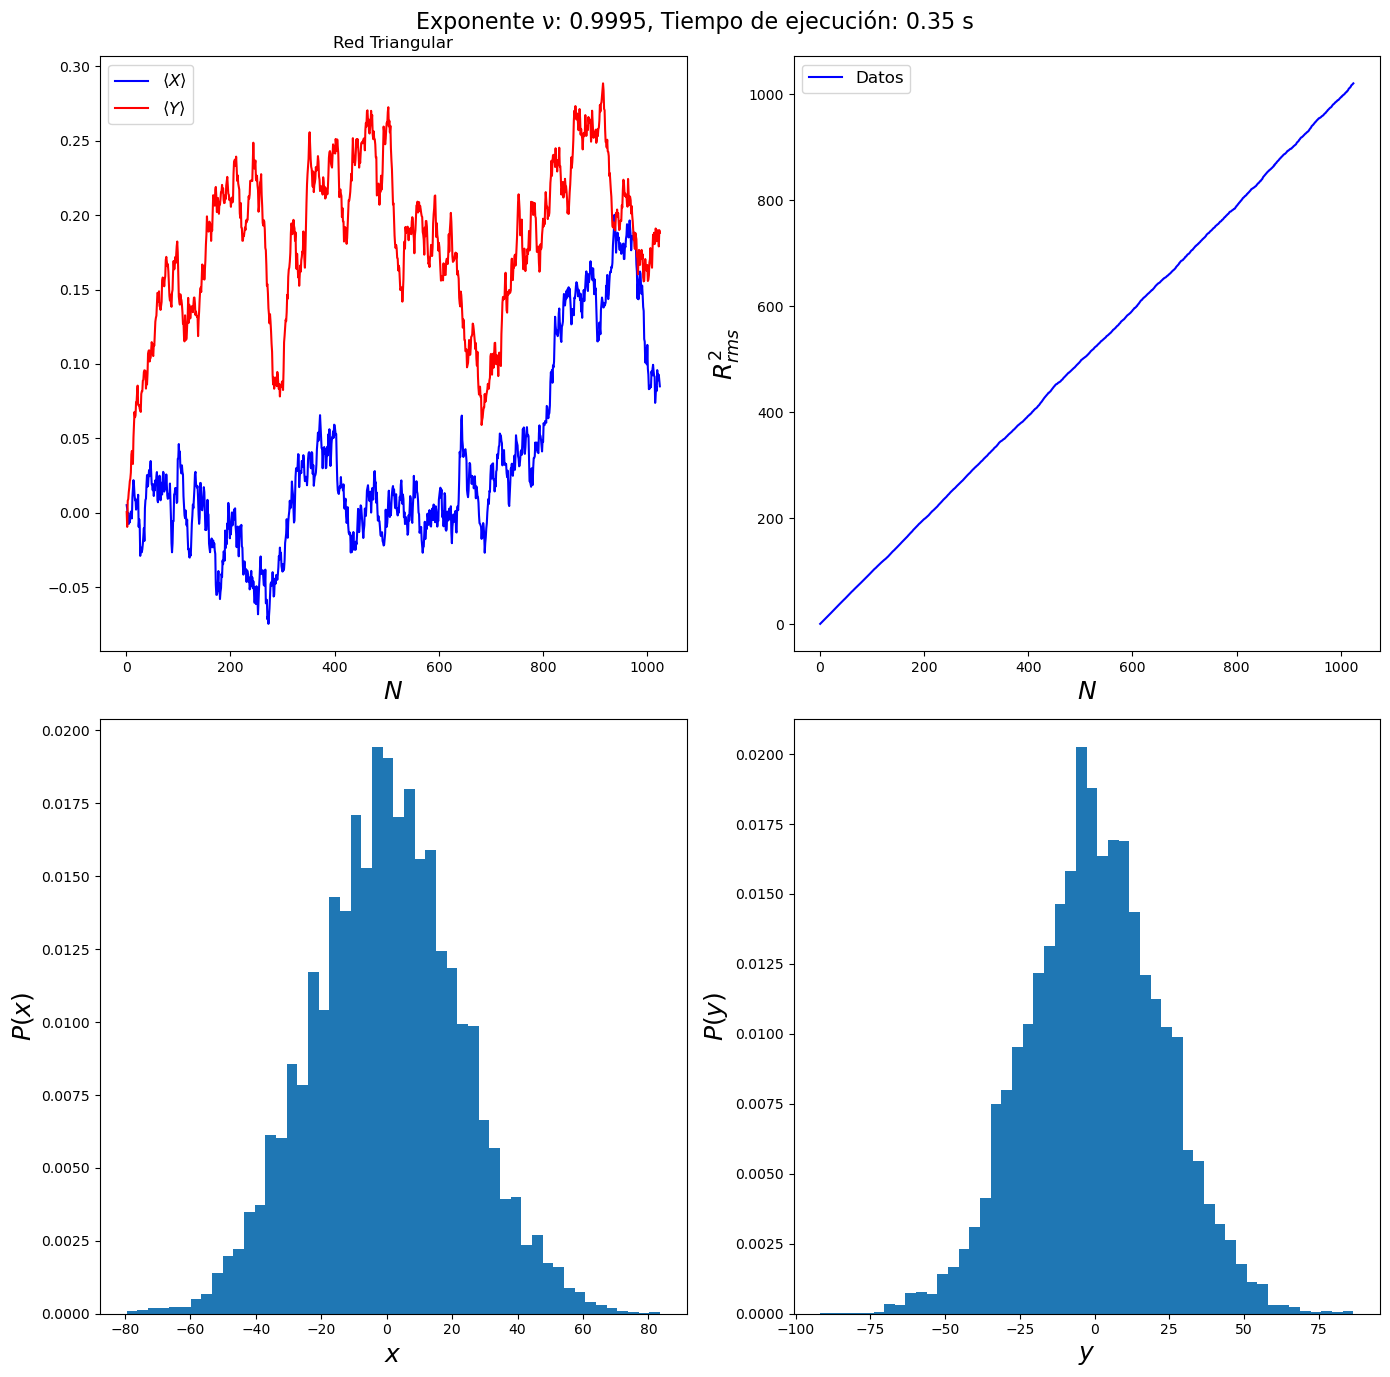

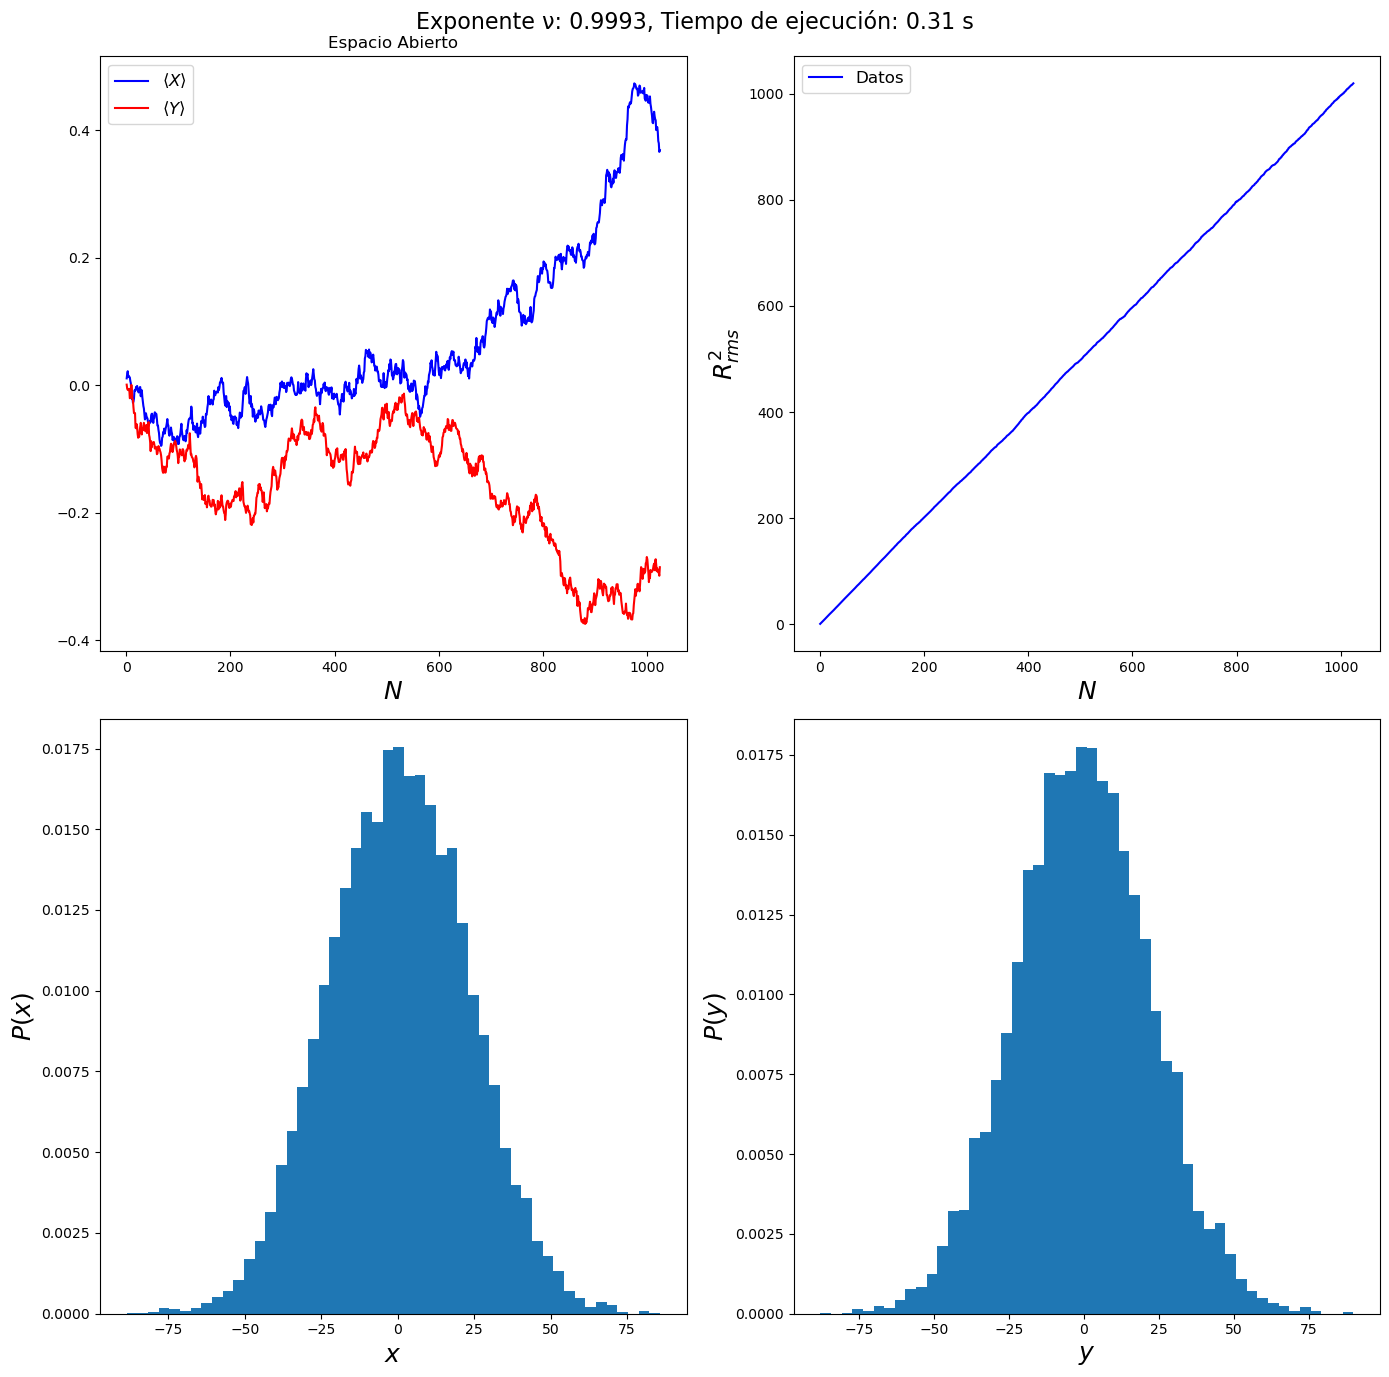

In [107]:
m = 10000
n = 1024

Xmean_triangulo, Ymean_triangulo, R2_triangulo, XparaN_triangulo, YparaN_triangulo, nu_triangulo, tiempo_triangulo = CamAleaTriangulo(n, m)
plots(n, Xmean_triangulo, Ymean_triangulo, R2_triangulo, XparaN_triangulo, YparaN_triangulo, 'Red Triangular', nu_triangulo, tiempo_triangulo)

Xmean_libre, Ymean_libre, R2_libre, XparaN_libre, YparaN_libre, nu_libre, tiempo_libre = CamAleaLibreSpace(n, m)
plots(n, Xmean_libre, Ymean_libre, R2_libre, XparaN_libre, YparaN_libre, 'Espacio Abierto', nu_libre, tiempo_libre)

Los resultados de las simulaciones de caminantes aleatorios en una red triangular y en un espacio abierto bidimensional muestran que el desplazamiento cuadrático medio escala de manera similar en ambos casos, con un exponente ν cercano al valor teórico de 0.5. Esto indica que, a pesar de las restricciones de la red triangular, el comportamiento a gran escala de los caminantes es comparable al de un espacio abierto. Las distribuciones de las posiciones finales se ajustan a la forma gaussiana esperada, lo que refleja la naturaleza aleatoria de los movimientos. La eficiencia computacional de las simulaciones es adecuada para el tamaño de la red y el número de pasos considerados.